# Classification

In this notebook, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied
so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or
later they tackle MNIST. 

Scikit-Learn provides many helper functions to download popular datasets. MNIST is
one of them. The following code fetches the MNIST dataset:1

In [8]:
# imports
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

mnist = load_digits()

mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
# main data
X = mnist["data"]

# target array
y = mnist["target"]

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


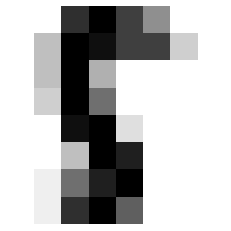

5


In [19]:
import random

# a sample instance
random_num = random.randint(0, 1100)
some_digit = X[random_num]
some_digit_image = some_digit.reshape(8, 8)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

print(y[random_num])

#### Splitting data

In [11]:
X_train, X_test, y_train, y_test = X[: 1100], X[1100:], y[: 1100], y[1100:]

import numpy as np

shuffle_index = np.random.permutation(1100)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a binary classifier

Simplifying the problem for now and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task:

In [13]:
y_train_5 = (y_train == 5)     # True for all 5s; False for all other digits
y_test_5 = (y_test == 5)

# Now our y arrays have only two classes; True and False (5 or not 5)

y_train_5

array([False, False, False, ..., False, False, False])

In [20]:
from sklearn.linear_model import SGDClassifier
"""
The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you
should set the random_state parameter.
"""

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# predict on an instance
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this chapter on this topic. There are many performance measures available.

#### 1. Measuring Accuracy Using Cross Validation
A good way to evaluate a model is to use cross validation

In [21]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.97820163, 0.99455041, 0.97540984])

Wow! Above 96% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn’t it? 
Well, before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:

In [24]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

# evaluating dumb classfier with cross-validation
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.88828338, 0.89100817, 0.91530055])

That’s right, it has over 88% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. Beats Nostradamus.

This demonstrates why accuracy is generally **not the preferred performance measure for classifiers**, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

Also known as Class Imbalance.

#### 2. Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix.